# **Deep Learning - CSE4006**
# LAB 5

> ## Name: **K CHARVI**
> ## Reg No: 19BCE7002
> ## Date: 27|10|2021
> ## Submitted To: Dr. BKSP Kumarraju Alluri


# Question 1: Perform Transfer Learning with ResNet

## IMPORTING DATASET 

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Deep learning LAB/'

In [8]:
%cd /content/drive/MyDrive/Deep learning LAB

/content/drive/MyDrive/Deep learning LAB


In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 98% 221M/225M [00:06<00:00, 49.7MB/s]
100% 225M/225M [00:06<00:00, 38.5MB/s]


In [ ]:
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  i

### Importing Libraries

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle

### Analysing Dataset 

[764, 1052, 784, 733, 984]


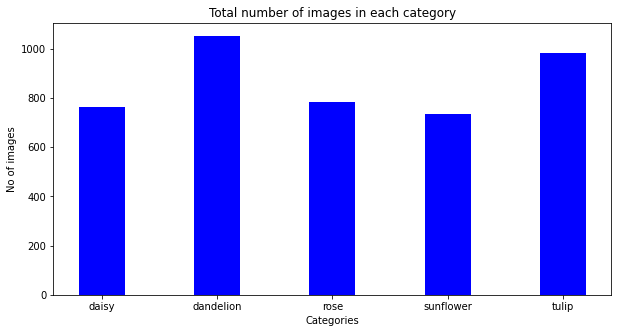

In [10]:
dir = '/content/drive/MyDrive/Deep learning LAB/flowers'
classes = ['daisy','dandelion','rose','sunflower','tulip']
values = []
total_images = 0
for c in classes :
  flower_path = os.path.join(dir,c)
  count = 0
  for path in os.listdir(flower_path):
      count+=1
  values.append(count)
  total_images +=count
print(values)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(classes, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("No of images")
plt.title("Total number of images in each category")
plt.show()

### Preparing dataset:
Storing the data from the records list as data.pickel file 

In [ ]:
def prepare_dataset():
    record = []
    for c in classes :
        path = os.path.join(dir,c)
        label = classes.index(c)

        for img_name in os.listdir(path):
            image_path = os.path.join(path,img_name)
            image = cv2.imread(image_path)

            try :
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    #Converting from BGR to RGB
                image = cv2.resize(image,(224,224))               #Resizing images to give into resnet

                image = np.array(image,dtype=np.float32)
                record.append([image,label])

            except Exception as e :
                pass

    pik = open('data.pickle','wb')
    pickle.dump(record,pik)
    pik.close()

In [ ]:
prepare_dataset()

In [11]:
%cd /content/drive/MyDrive/Deep learning LAB

/content/drive/MyDrive/Deep learning LAB


In [12]:
# Function to load dataset from the pickle file and taking the features and corresponding labels
def load_dataset():
    pick = open('data.pickle','rb')
    data = pickle.load(pick)
    pick.close()

    np.random.shuffle(data)

    feature = []
    labels = []

    for img,label in data :
        feature.append(img)
        labels.append(label)

    feature = np.array(feature,dtype=np.float32)
    labels = np.array(labels)

    feature = feature/255.0    #Normalization

    return [feature,labels]

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [14]:
#Splitting the dataset of each type of flower to train and test
(feature,labels) = load_dataset()
X_train, X_test, Y_train, Y_test = train_test_split(feature,labels,test_size = 0.1,random_state=42)


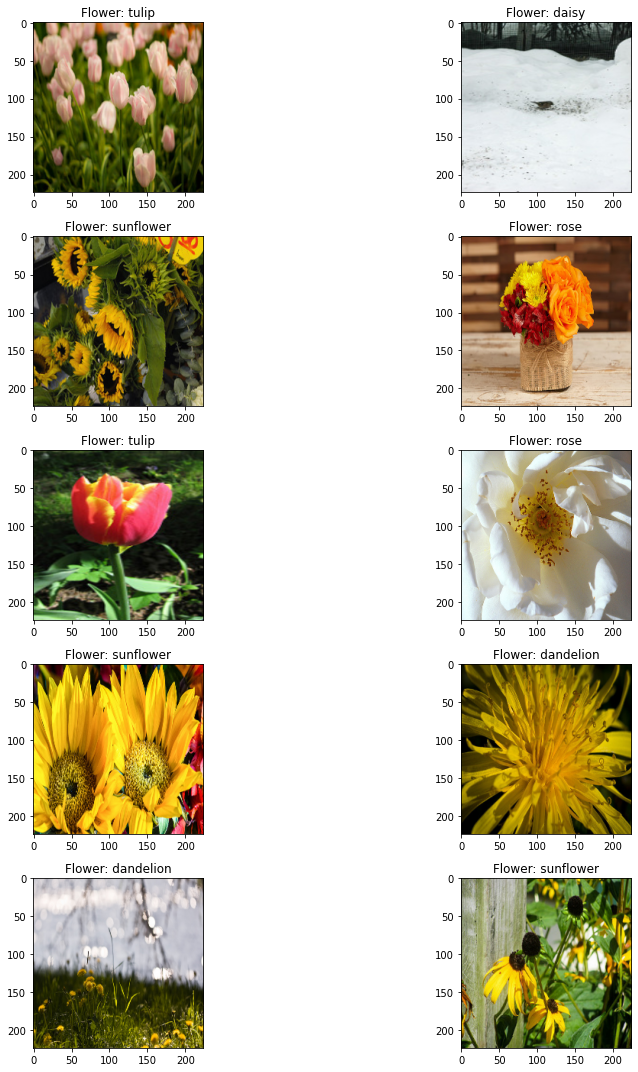

In [ ]:
# Viewing some of the data samples from the training split, to ensure proper working without errors.
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(X_test))
        ax[i,j].imshow(X_test[l])
        ax[i,j].set_title('Flower: '+classes[Y_test[l]])
        
plt.tight_layout()

 ### Model Preparation, Training and Testing

In [ ]:
model=tf.keras.applications.ResNet50V2(include_top=False,input_shape=(224,224,3))
for layer in model.layers:
   layer.trainable = False

flatten_layer = tf.keras.layers.Flatten()(model.output)
flattened_fc_layer = tf.keras.layers.Dense(224, activation='relu')(flatten_layer)
flattened_fc_softmax_layer = tf.keras.layers.Dense(5, activation='softmax')(flattened_fc_layer)


In [ ]:
model = tf.keras.Model(inputs=model.inputs, outputs=flattened_fc_softmax_layer)


In [ ]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

#### Performing data augmentation to avoid model overfitting.

In [15]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True  # randomly flip images
      )  # randomly flip images


datagen.fit(X_train)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(datagen.flow(X_train,Y_train), validation_data = (X_test,Y_test), epochs=10)

Epoch 1/10
122/122 [==============================] - 57s 439ms/step - loss: 0.2808 - accuracy: 0.9112 - val_loss: 0.6312 - val_accuracy: 0.8727
Epoch 2/10
122/122 [==============================] - 53s 437ms/step - loss: 0.2791 - accuracy: 0.9171 - val_loss: 0.4871 - val_accuracy: 0.8819
Epoch 3/10
122/122 [==============================] - 54s 443ms/step - loss: 0.2223 - accuracy: 0.9212 - val_loss: 0.5193 - val_accuracy: 0.8819
Epoch 4/10
122/122 [==============================] - 53s 437ms/step - loss: 0.2326 - accuracy: 0.9248 - val_loss: 0.5204 - val_accuracy: 0.8796
Epoch 5/10
122/122 [==============================] - 53s 436ms/step - loss: 0.2337 - accuracy: 0.9254 - val_loss: 0.5265 - val_accuracy: 0.8704
Epoch 6/10
122/122 [==============================] - 53s 435ms/step - loss: 0.2177 - accuracy: 0.9246 - val_loss: 0.4812 - val_accuracy: 0.8843
Epoch 7/10
122/122 [==============================] - 53s 435ms/step - loss: 0.1961 - accuracy: 0.9372 - val_loss: 0.4900 - val_ac

In [ ]:
model.save('flower_pred_updated.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


### Lets Predict and check our model

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model = load_model('/content/drive/MyDrive/Deep learning LAB/flower_pred_updated.h5')

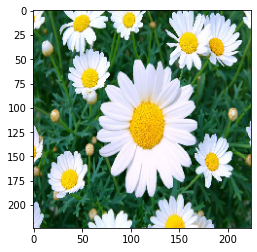

In [ ]:
img = load_img('/content/drive/MyDrive/Deep learning LAB/predict_img.jpg', target_size=(224,224))
plt.imshow(img)
plt.show()

In [ ]:
img = img_to_array(img)
img = img.reshape(1,224,224,3)

In [ ]:
result = model.predict(img)

In [ ]:
class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
print(result)

[[1. 0. 0. 0. 0.]]


In [ ]:
result = np.argmax(result)
print(result)

0


In [ ]:
print([key for key in classes][result])

daisy


#### VOILA!! Predicted Daisy!

### Plotting Model Accuracy

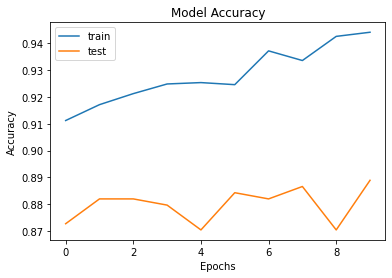

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

#### UMM🤔 The model accuracy of more than 85 overall!  NOT BAD!

# Question 2: Do Training for Non-Dense layers while using Transfer learning

In [26]:
tf.random.set_seed(9)
 
model2=tf.keras.applications.ResNet50V2(include_top=False,input_shape=(224,224,3))
model2.summary()

for layer in model2.layers:
  layer.trainable = True
len(model2.layers)
for layer in model2.layers[45:]:               #AS SIR MENTIONED, I HAVE TAKEN THE LAYERS OF RESNET 50 UNTIL 45 THE REST OF WHICH FORMS THE NON DENSE LAYERS
  print("{}: {}".format(layer.name, layer.trainable))

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [29]:
flatten_layer = tf.keras.layers.Flatten()(model2.output)
flattened_fc_layer = tf.keras.layers.Dense(224, activation='relu')(flatten_layer)
flattened_fc_softmax_layer = tf.keras.layers.Dense(5, activation='softmax')(flattened_fc_layer)



model2= tf.keras.Model(inputs=model2.inputs, outputs=flattened_fc_softmax_layer)

model2.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model2.fit(datagen.flow(X_train,Y_train), validation_data = (X_test,Y_test), epochs=5)
model2.summary()

Epoch 1/5
122/122 [==============================] - 2425s 20s/step - loss: 1.5687 - accuracy: 0.2739 - val_loss: 1.6711 - val_accuracy: 0.2130
Epoch 2/5
122/122 [==============================] - 2400s 20s/step - loss: 1.5785 - accuracy: 0.2458 - val_loss: 1.6498 - val_accuracy: 0.1736
Epoch 3/5
122/122 [==============================] - 2409s 20s/step - loss: 1.5499 - accuracy: 0.2615 - val_loss: 1.6581 - val_accuracy: 0.2037
Epoch 4/5
122/122 [==============================] - 2385s 20s/step - loss: 1.5383 - accuracy: 0.2857 - val_loss: 1.6810 - val_accuracy: 0.2222
Epoch 5/5
122/122 [==============================] - 2396s 20s/step - loss: 1.5311 - accuracy: 0.3089 - val_loss: 1.5767 - val_accuracy: 0.2523
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0           